In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = semua log, 1 = info, 2 = warning, 3 = error saja


In [9]:
data_dir = '/kaggle/input/dataset-product-boikot-nonboikot/Minitask-Boikot-Dataset'

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='binary'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='binary'
)

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [11]:
base_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False  # Transfer learning

In [12]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

import joblib

# Simpan model
joblib.dump(model, 'model_boikot.pkl')

# Load model kembali
model = joblib.load('model_boikot.pkl')


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.3083 - loss: 0.9624 - val_accuracy: 0.8000 - val_loss: 0.3804
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.7396 - loss: 0.4896 - val_accuracy: 0.6000 - val_loss: 0.9894
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.7229 - loss: 0.4502 - val_accuracy: 0.7000 - val_loss: 0.4893
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step - accuracy: 0.9667 - loss: 0.2217 - val_accuracy: 0.9000 - val_loss: 0.2091
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step - accuracy: 0.8500 - loss: 0.3033 - val_accuracy: 1.0000 - val_loss: 0.1294
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step - accuracy: 0.9500 - loss: 0.1270 - val_accuracy: 1.0000 - val_loss: 0.1474
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - accuracy: 0.9417 - loss: 0.1278 - val_accuracy: 1.0000 - val_loss: 0.1825
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step - accuracy: 0.9833 - loss: 0.0591 - val_accuracy: 0.9000 - val_loss: 0

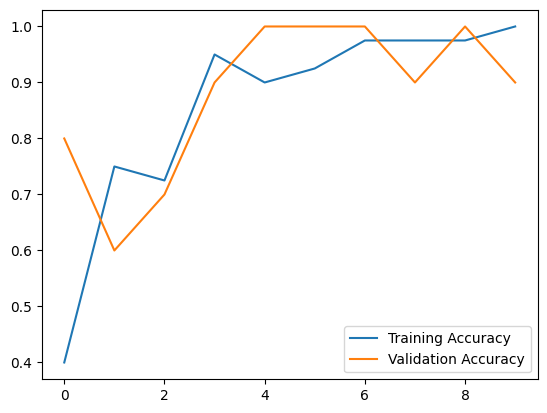

In [13]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/kaggle/input/predict-data/Screenshot 2025-07-21 081853.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction < 0.5:
    print("Kategori: Tidak Boikot")
else:
    print("Kategori: Boikot")



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Kategori: Tidak Boikot
